Digite ano desejado no formato YYYY: 2019
Digite mês desejado no formato MM: 04
2019-04


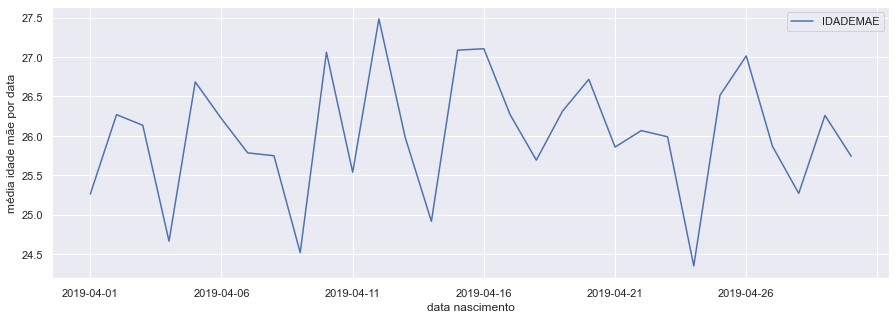

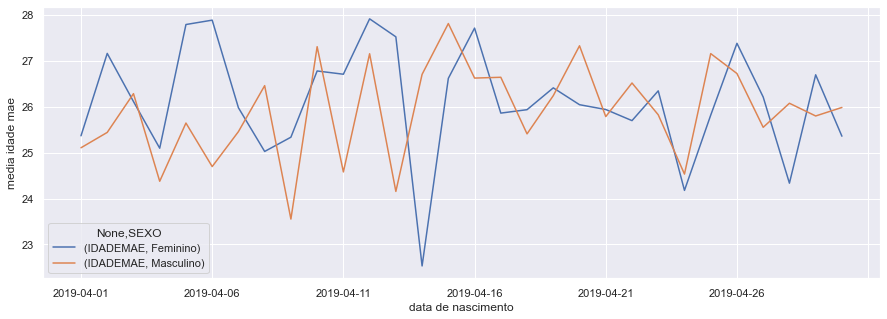

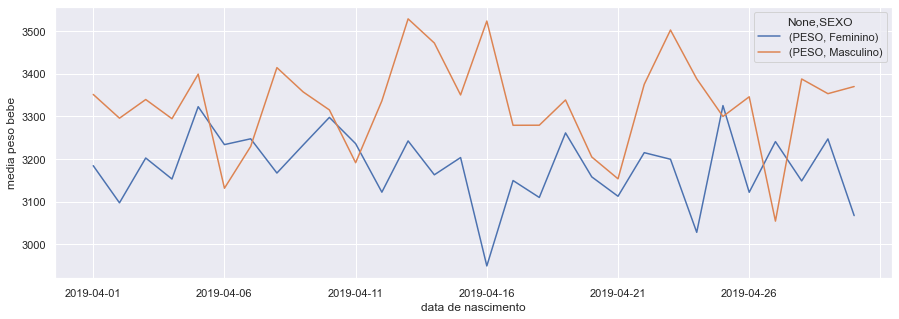

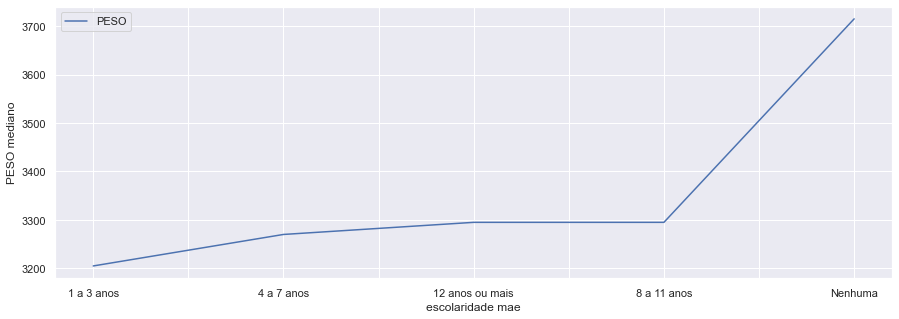

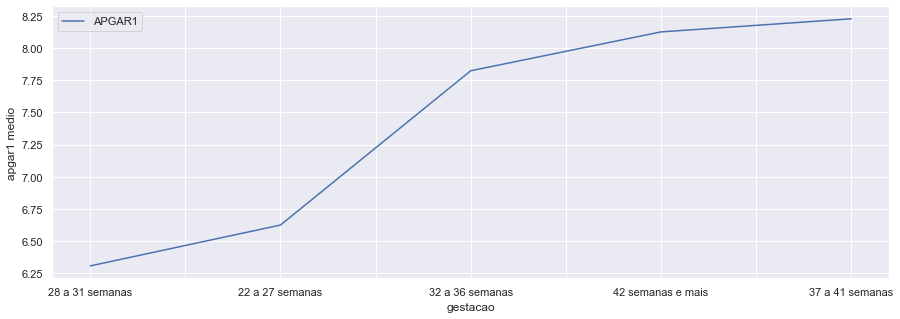

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

sns.set()  

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).unstack().plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None


def printMonth(num):
    if num == 1:
        month = 'JAN'
    elif num == 2:
        month = 'FEV'
    elif num == 3:
        month = 'MAR'
    elif num == 4:
        month= 'ABR'
    elif num == 5:
        month= 'MAI'
    elif num == 6:
        month = 'JUN'
    elif num == 7:
        month = 'JUL'
    elif num == 8:
        month = 'AGO'
    elif num == 9:
        month= 'SET'
    elif num == 10:
        month= 'OUT'
    elif num == 11:
        month= 'NOV'
    elif num == 12:
        month= 'DEZ'
    return month



ano = input ('Digite ano desejado no formato YYYY: ')
mes_aux = int(input ('Digite mês desejado no formato MM: '))
mes = printMonth(mes_aux)
nome_arq = 'SINASC_RO_' + ano + '_' + mes +'.csv'

#Lendo arquivo
sinasc = pd.read_csv('./input/'+nome_arq)

#Mostrando data do arquivo
max_data = sinasc.DTNASC.max()[:7]
print(max_data)

#Criando diretório
os.makedirs('./output/figs/'+max_data, exist_ok=True)

#Rodando os gráficos
plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'mean', 'média idade mãe por data', 'data nascimento')
plt.savefig('./output/figs/'+max_data+'/media idade mae por data.png')

plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media peso bebe por sexo.png')

plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'PESO mediano','escolaridade mae','sort')
plt.savefig('./output/figs/'+max_data+'/PESO mediano por escolaridade mae.png')

plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar1 por gestacao.png')

**Análise:** Um código mais geral que permite escolher o mês que deseja os gráficos, ao invés de realizar um código para cada mês, acredito ter dado uma pequena automatizada, pelo menos esse código pode ser usado para todo o ano de 2019. Para atualizar para os próximos anos só pedir um input do ano e criar mais umas linhas de código para podermos trabalhar com a variável ano, isso tudo seria muito semelhante ao que eu fiz na variável mes.